# Leaflet Language Distribution

This notebook explores the language distribution in the dataset I collected (1946-1963).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette("Set2")


# Dataset 1946-1963 before preprocessing to include all pages
df = pd.read_csv('dataset.csv', sep=';')
sns.set_palette("Set2")
df.head()

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Image,Collection,Production,Date,Occasion,Leaflet Language
0,Scan 2024-02-14 1120-1.jpeg,1946-1947,NaN,NaN,NaN,ned
1,Scan 2024-02-14 1120-2.jpeg,1946-1947,NaN,NaN,NaN,NaN
2,Scan 2024-02-14 1120-3.jpeg,1946-1947,NaN,NaN,NaN,ned
3,Scan 2024-02-14 1120-4.jpeg,1946-1947,NaN,NaN,NaN,ned
4,Scan 2024-02-14 1120-5.jpeg,1946-1947,NaN,NaN,NaN,ned


In [2]:
# Strip leading and trailing whitespace
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [3]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [4]:
# Remove rows with NaN values in the 'Leaflet Language' column
df = df.dropna(subset=['Leaflet Language'])

In [5]:
df.shape

(12446, 6)

In [6]:
df['Leaflet Language'].value_counts()

ned        12393
fra           28
ned+fra       21
eng            2
ned+eng        2
Name: Leaflet Language, dtype: int64

In [7]:
counts = df.groupby('Collection')['Leaflet Language'].value_counts().unstack().fillna(0)

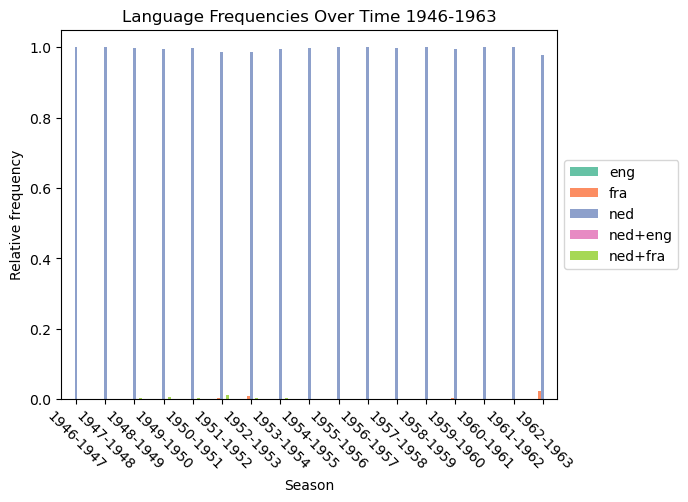

In [9]:
# Relative frequencies

total_counts = counts.sum(axis=1)

# Relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='bar')

plt.title('Language Frequencies Over Time 1946-1963')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.xticks(rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [10]:
rel_counts

Leaflet Language,eng,fra,ned,ned+eng,ned+fra
Collection,,,,,
1946-1947,0.000000,0.000000,1.000000,0.000000,0.000000
1947-1948,0.000000,0.000000,1.000000,0.000000,0.000000
1948-1949,0.000000,0.000000,0.998020,0.000000,0.001980
1949-1950,0.000000,0.000000,0.994094,0.000000,0.005906
1950-1951,0.000000,0.000000,0.998054,0.000000,0.001946
1951-1952,0.000000,0.003623,0.985507,0.000000,0.010870
1952-1953,0.000000,0.009174,0.986239,0.000000,0.004587
1953-1954,0.000000,0.000000,0.995902,0.000000,0.004098
1954-1955,0.000000,0.000000,0.998390,0.000000,0.001610


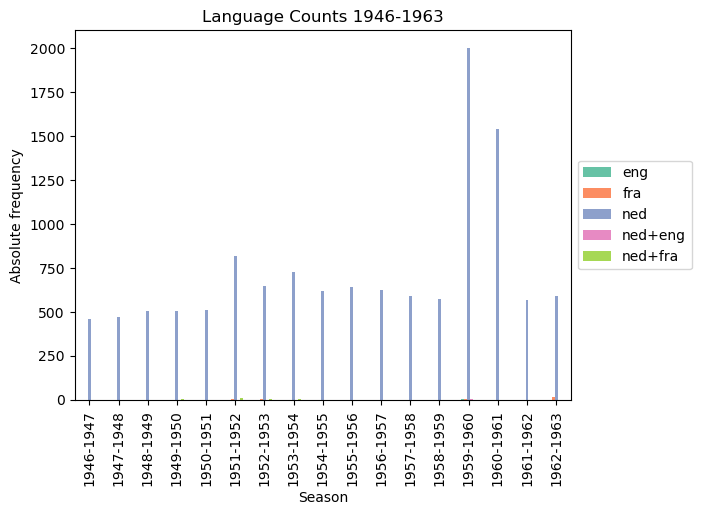

In [12]:
# Absolute frequencies

counts.plot(kind='bar')

plt.title('Language Counts 1946-1963')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [13]:
counts

Leaflet Language,eng,fra,ned,ned+eng,ned+fra
Collection,,,,,
1946-1947,0.0,0.0,458.0,0.0,0.0
1947-1948,0.0,0.0,471.0,0.0,0.0
1948-1949,0.0,0.0,504.0,0.0,1.0
1949-1950,0.0,0.0,505.0,0.0,3.0
1950-1951,0.0,0.0,513.0,0.0,1.0
1951-1952,0.0,3.0,816.0,0.0,9.0
1952-1953,0.0,6.0,645.0,0.0,3.0
1953-1954,0.0,0.0,729.0,0.0,3.0
1954-1955,0.0,0.0,620.0,0.0,1.0
